## Coding Exercise #0801

### 1. Keras Sequential API model:

In [25]:
# Install if necessary.
#!pip install keras

In [1]:
#To enable CPU execution only
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
# Available backend options are: "jax", "tensorflow", "torch".
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data and explore:

In [4]:
!wget --no-clobber https://raw.githubusercontent.com/tn-220/SIC-Machine-Learning/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_09_Coding_Exercises/data_boston.csv

File ‘data_boston.csv’ already there; not retrieving.



In [5]:
# Read.
df = pd.read_csv('data_boston.csv', header='infer',encoding = 'latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [6]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Scale the X data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
# Spit the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

#### 1.2. Define a Sequential API model:

In [9]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))    # Add a output layer for linear regression.

2024-06-13 16:21:26.874946: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
# Summary of the model.
my_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Define the hyperparameters and optimizer:

In [11]:
# Hyperparameters.
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

In [12]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model1.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])

#### 1.4. Train the model and visualize the history:

In [12]:
import time

In [14]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

Time elapsed: 34.495041370391846


In [14]:
# View the keys.
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

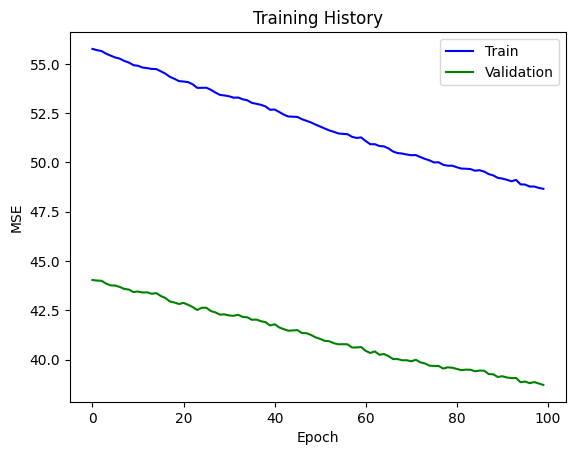

In [15]:
# Visualize the training history.
n_skip = 100                 # Skip the first few steps.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing:

In [16]:
# Predict and test using a formula.
y_pred = my_model1.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE,3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


6.72

In [17]:
# Use the evaluate() method.
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]        # Returns the 0 = loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 6.72


### 2. Keras Functional API model:

In [13]:
from keras.models import Model
from keras.layers import Input, Dense

#### 2.1. Define a Functional API model:

In [14]:
my_input = Input(shape=(n_vars,))                                     # Input layer.
my_output = Dense(units=1,activation='linear')(my_input)              # Output layer.

In [15]:
my_model2 = Model(inputs=my_input,outputs=my_output)                   # The model.

In [16]:
# Summary of the model.
my_model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model2.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])    # Loss = MAE (L1) and Metrics = MSE (L2).

#### 2.2. Train the model and visualize the history:

In [18]:
# Train the model.
my_summary = my_model2.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

Time elapsed: 108.62213587760925


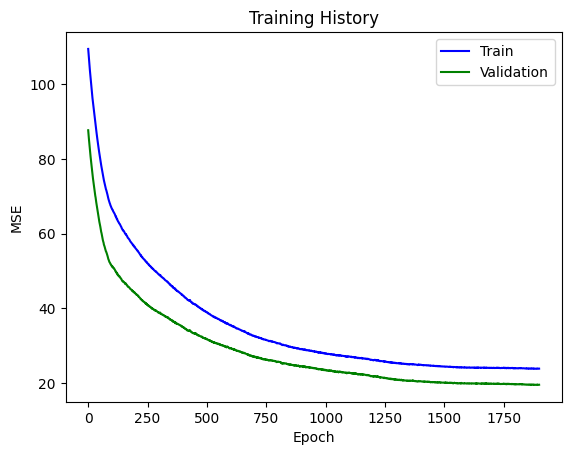

In [19]:
# Visualize the training history.
n_skip = 100                 # Skip the first few steps.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
# Use the evaluate() method.
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]        # Returns the 0 = loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 5.635
